# Time Series - Profiling

## covid19_pt.csv
Daily death reports from covid in the year of 2020

### Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

### Dimensionality

Nr. Records =  323
First timestamp 2020-01-22 00:00:00
Last timestamp 2020-12-09 00:00:00


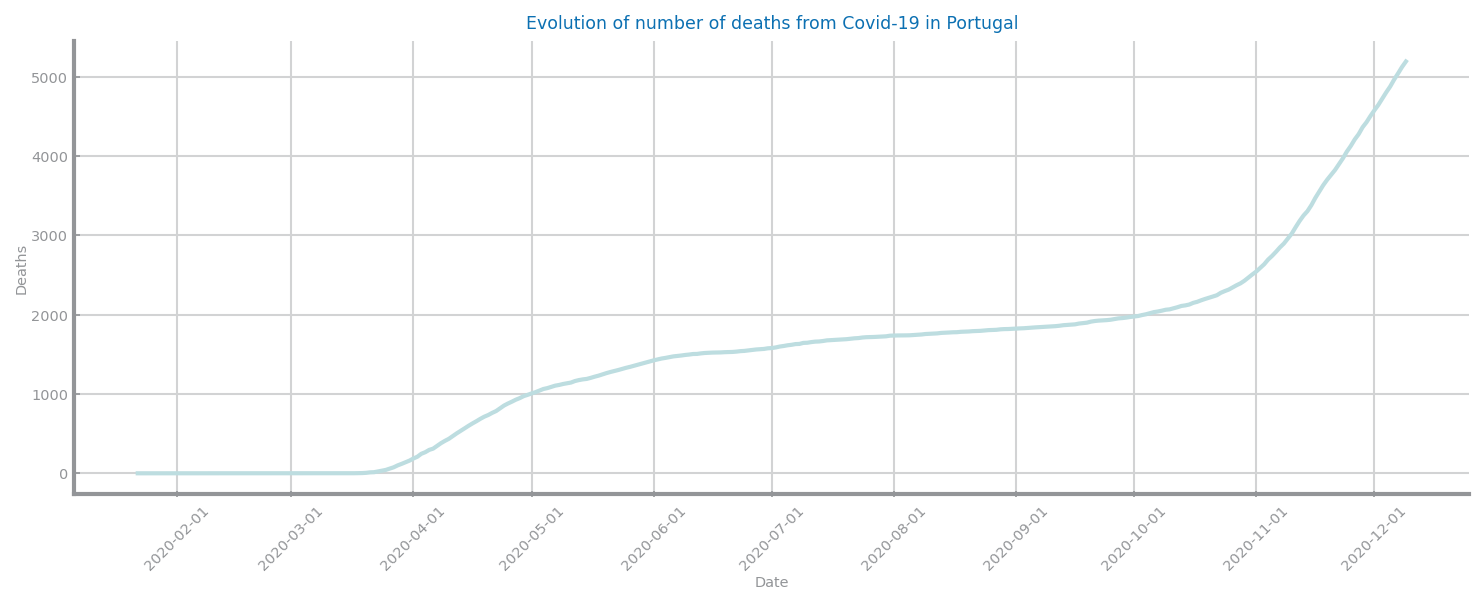

            deaths
Date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
...            ...
2020-12-05    4876
2020-12-06    4963
2020-12-07    5041
2020-12-08    5122
2020-12-09    5192

[323 rows x 1 columns]


In [72]:
data = pd.read_csv('covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["Date"]) #Dates weren't sorted


print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='Date', y_label='Deaths', title='Evolution of number of deaths from Covid-19 in Portugal')
plt.xticks(rotation = 45)
plt.show()

print(data)

### Granularity

#### Daily (Default)

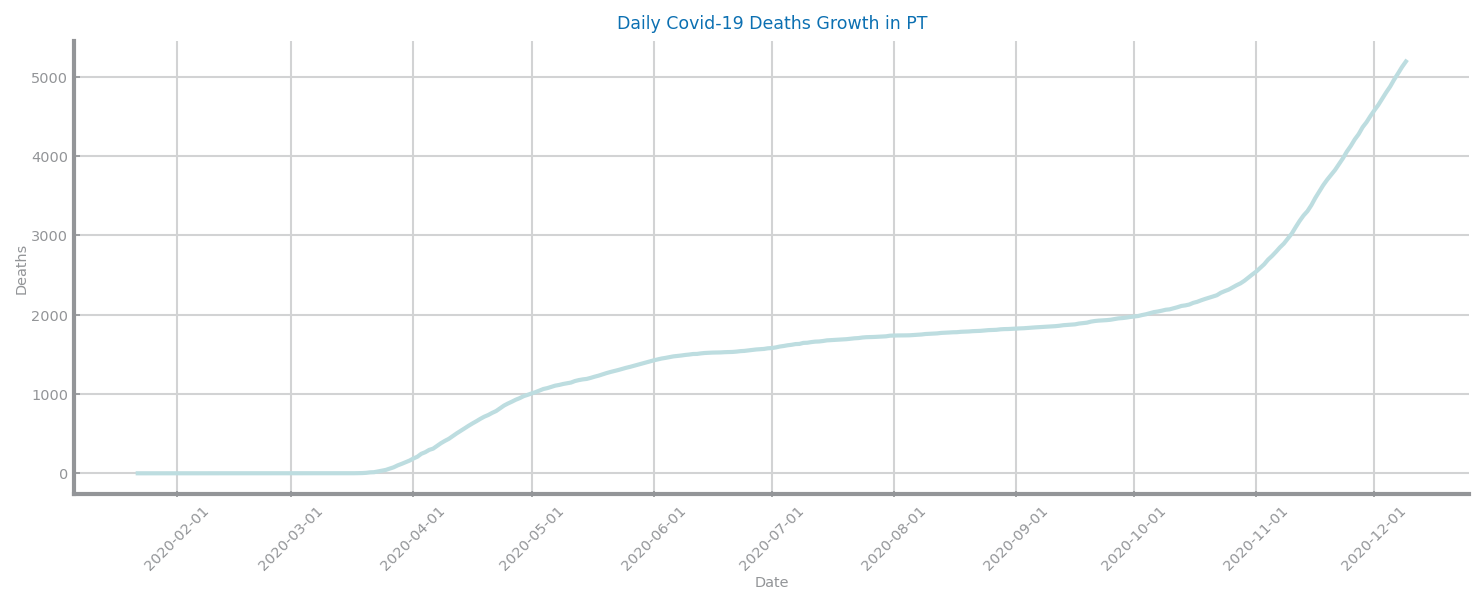

In [85]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='Date', y_label='Deaths', title='Daily Covid-19 Deaths Growth in PT')
plt.xticks(rotation = 45)
plt.show()

#### Weekly

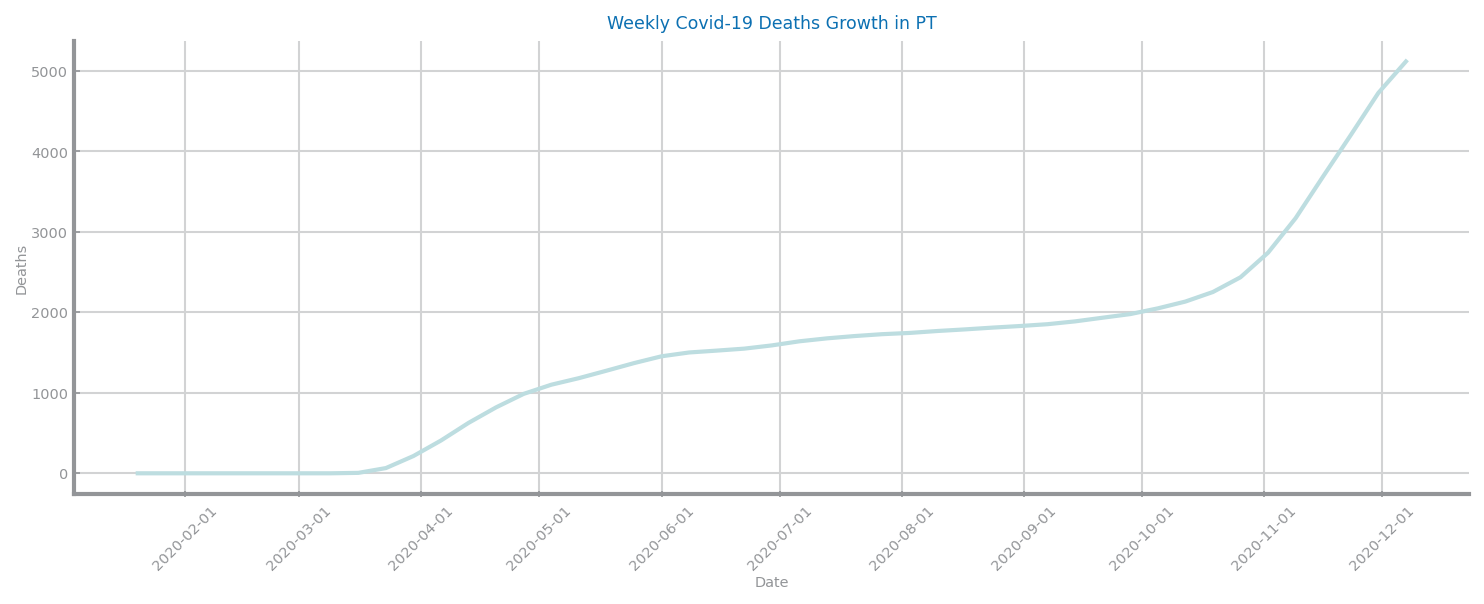

                 deaths
Date                   
2020-01-20     0.000000
2020-01-27     0.000000
2020-02-03     0.000000
2020-02-10     0.000000
2020-02-17     0.000000
2020-02-24     0.000000
2020-03-02     0.000000
2020-03-09     0.000000
2020-03-16     5.428571
2020-03-23    64.857143
2020-03-30   214.714286
2020-04-06   407.714286
2020-04-13   626.857143
2020-04-20   819.857143
2020-04-27   987.285714
2020-05-04  1100.857143
2020-05-11  1182.428571
2020-05-18  1275.000000
2020-05-25  1369.428571
2020-06-01  1454.285714
2020-06-08  1501.714286
2020-06-15  1524.857143
2020-06-22  1549.428571
2020-06-29  1589.571429
2020-07-06  1640.571429
2020-07-13  1677.142857
2020-07-20  1705.714286
2020-07-27  1729.000000
2020-08-03  1744.571429
2020-08-10  1768.428571
2020-08-17  1788.428571
2020-08-24  1810.571429
2020-08-31  1830.428571
2020-09-07  1853.142857
2020-09-14  1888.142857
2020-09-21  1933.857143
2020-09-28  1978.714286
2020-10-05  2049.857143
2020-10-12  2134.428571
2020-10-19  2253

In [73]:
index = data.index.to_period('W')
week_df = data.copy().groupby(index).mean()
week_df['Date'] = index.drop_duplicates().to_timestamp()
week_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly Covid-19 Deaths Growth in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(week_df)
print(week_df.shape)

#### Monthly

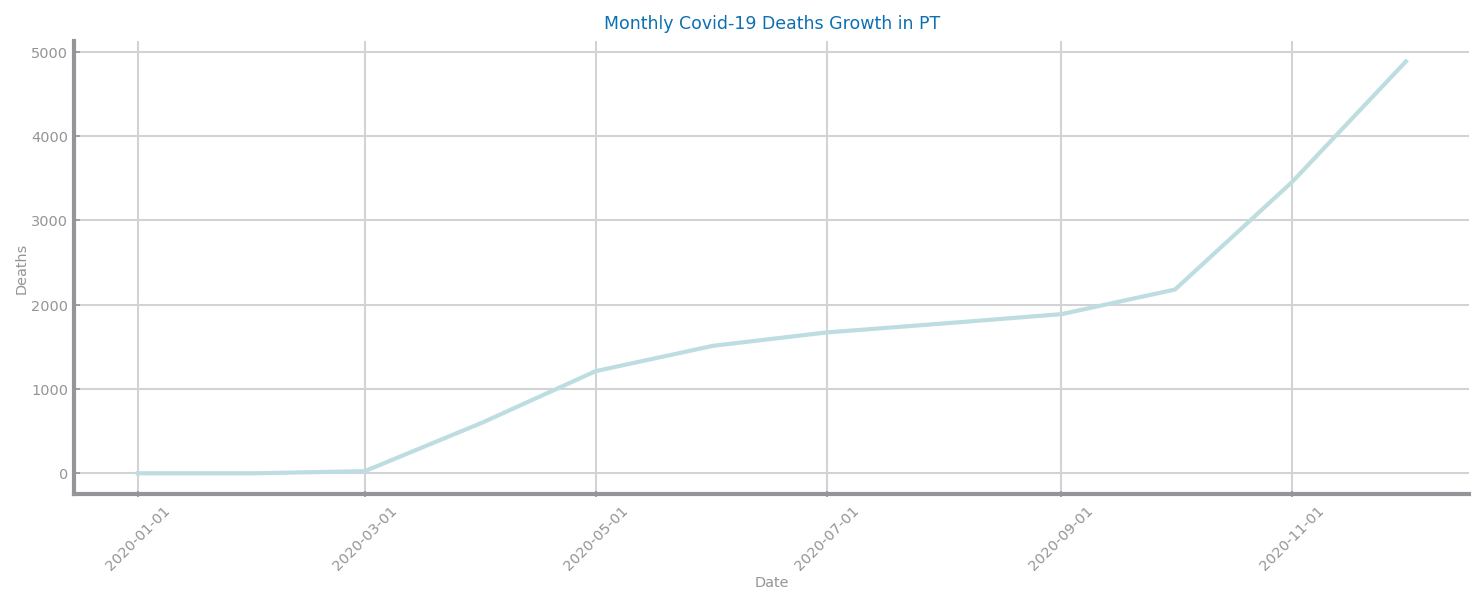

                 deaths
Date                   
2020-01-01     0.000000
2020-02-01     0.000000
2020-03-01    25.548387
2020-04-01   600.733333
2020-05-01  1211.838710
2020-06-01  1511.866667
2020-07-01  1670.161290
2020-08-01  1776.806452
2020-09-01  1886.933333
2020-10-01  2178.580645
2020-11-01  3457.133333
2020-12-01  4882.555556
(12, 1)


In [74]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).mean()
month_df['Date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(month_df, title='Monthly Covid-19 Deaths Growth in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(month_df)
print(month_df.shape)

#### Quarertly

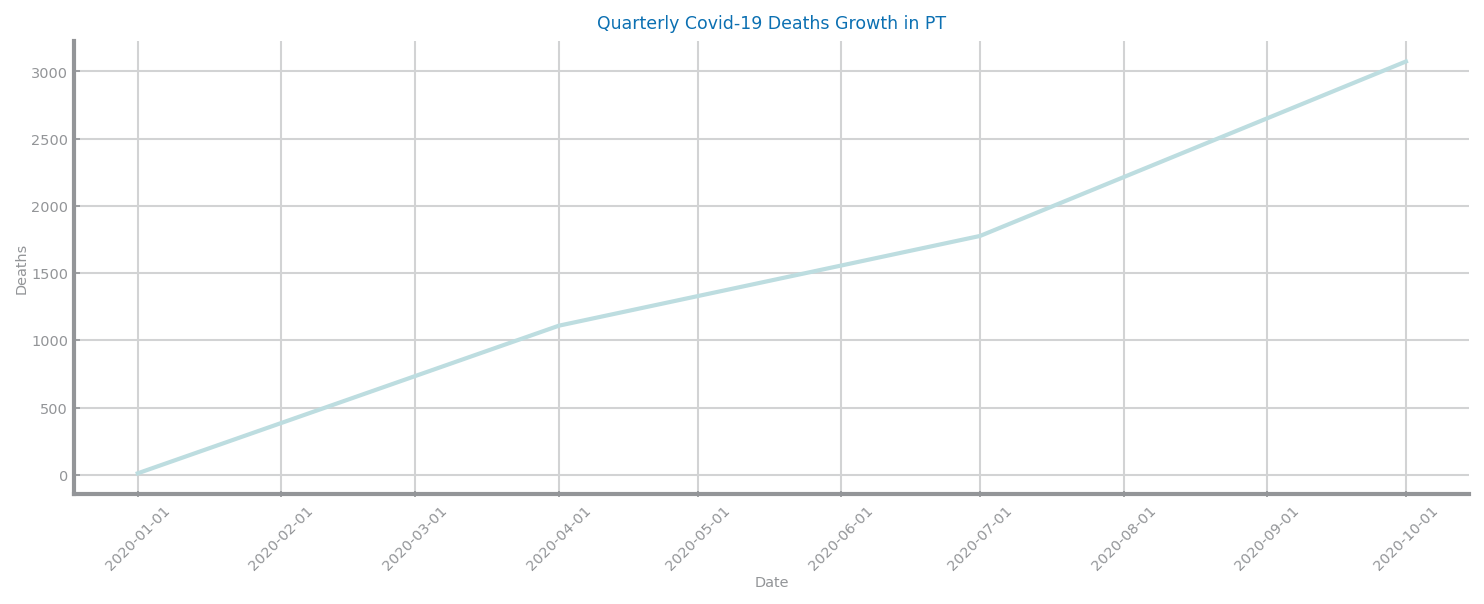

                 deaths
Date                   
2020-01-01    11.314286
2020-04-01  1109.285714
2020-07-01  1776.782609
2020-10-01  3074.185714
(4, 1)


In [75]:
index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).mean()
quarter_df['Date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Quarterly Covid-19 Deaths Growth in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(quarter_df)
print(quarter_df.shape)

### Distribution

#### 5-Number Summary

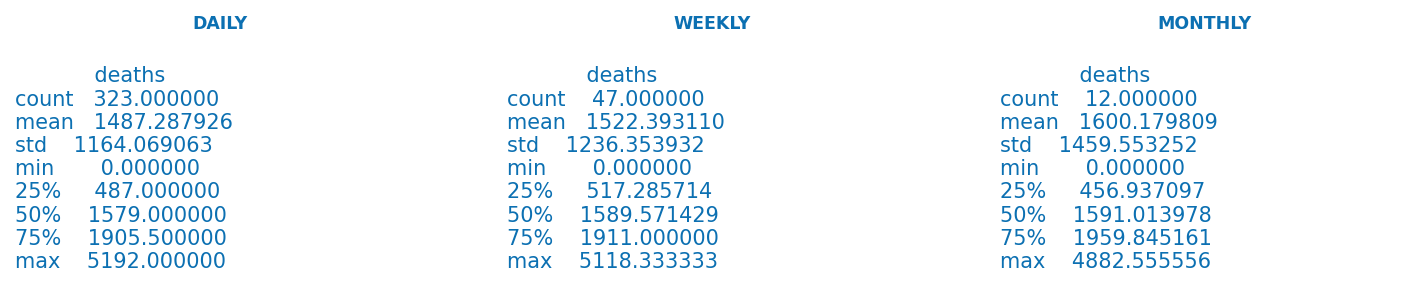

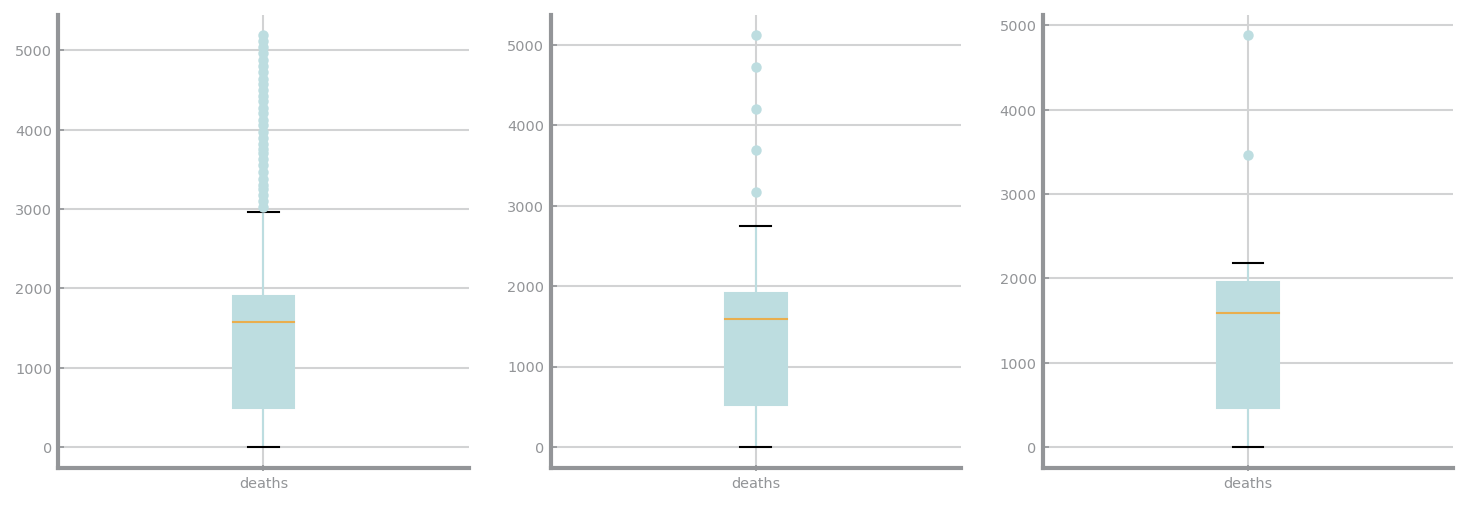

In [76]:
index = data.index.to_period('W')
week_df = data.copy().groupby(index).mean()
week_df['Date'] = index.drop_duplicates().to_timestamp()
week_df.set_index('Date', drop=True, inplace=True)

index = data.index.to_period('M')
month_df = data.copy().groupby(index).mean()
month_df['Date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('Date', drop=True, inplace=True)

_, axs = plt.subplots(1, 3, figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('DAILY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('WEEKLY', fontweight="bold")
axs[1].text(0, 0, str(week_df.describe()))
axs[2].grid(False)
axs[2].set_axis_off()
axs[2].set_title('MONTHLY', fontweight="bold")
axs[2].text(0, 0, str(month_df.describe()))
plt.show()

_, axs = plt.subplots(1, 3, figsize=(3*ts.HEIGHT, ts.HEIGHT))
data.boxplot(ax=axs[0])
week_df.boxplot(ax=axs[1])
month_df.boxplot(ax=axs[2])
plt.show()

#### Variables Distribution

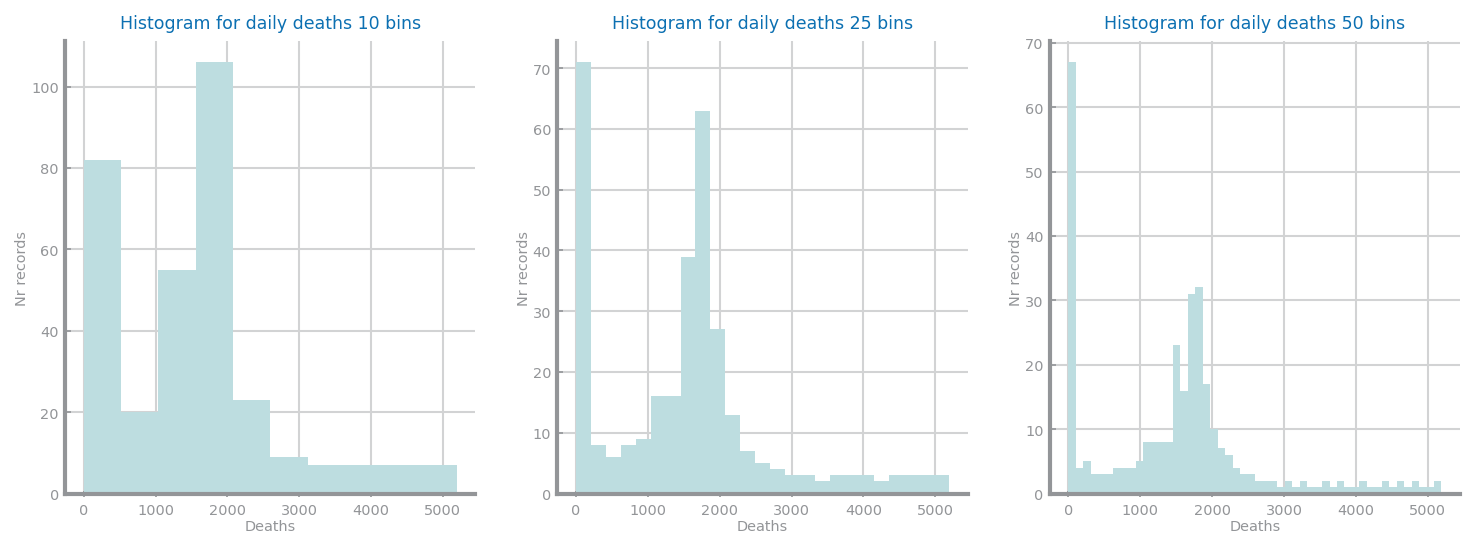

In [77]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for daily deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
plt.show()

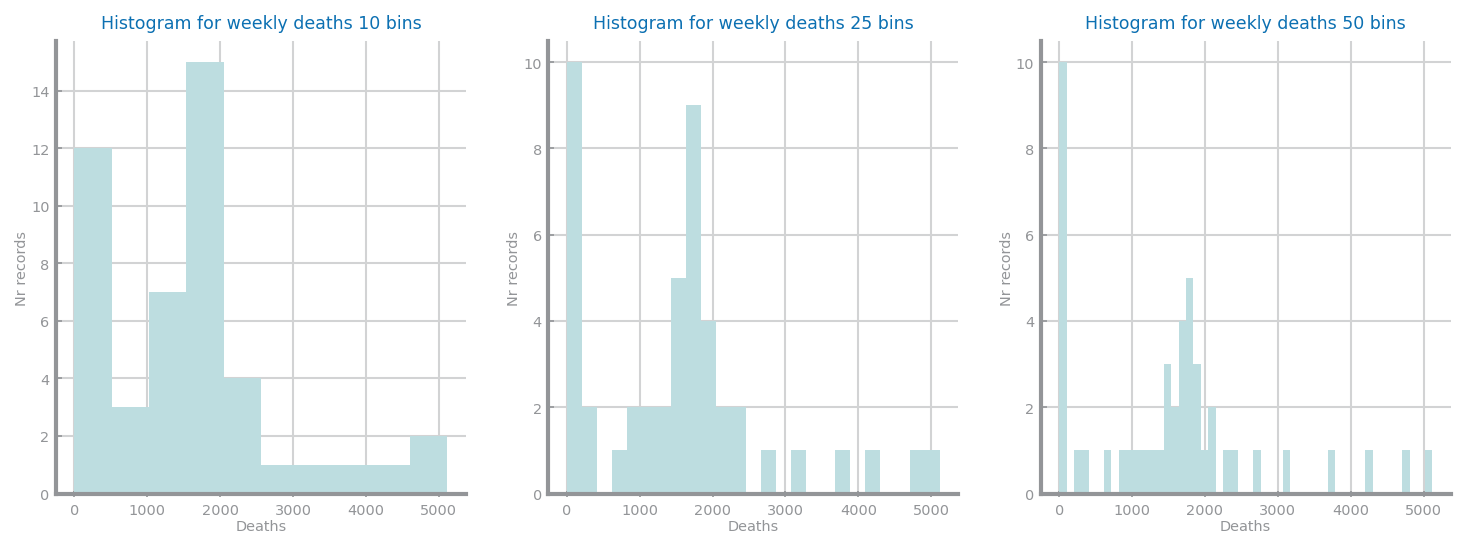

In [78]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(week_df.values, bins=bins[j])
plt.show()

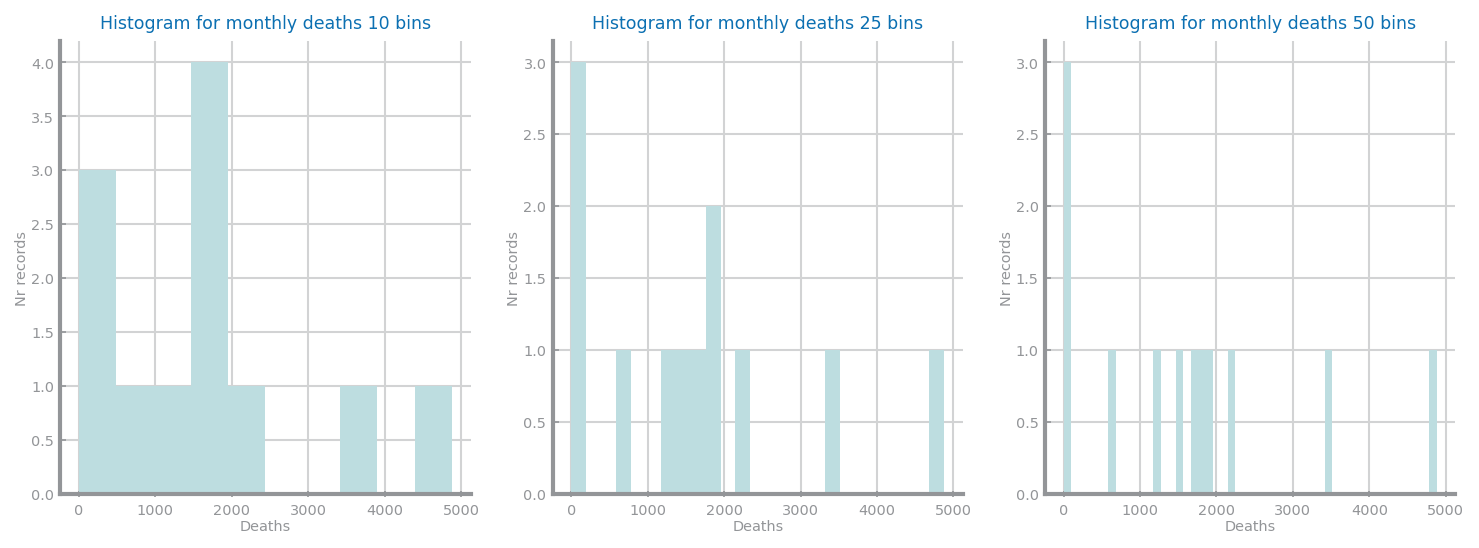

In [79]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(month_df.values, bins=bins[j])
plt.show()

### Stationarity

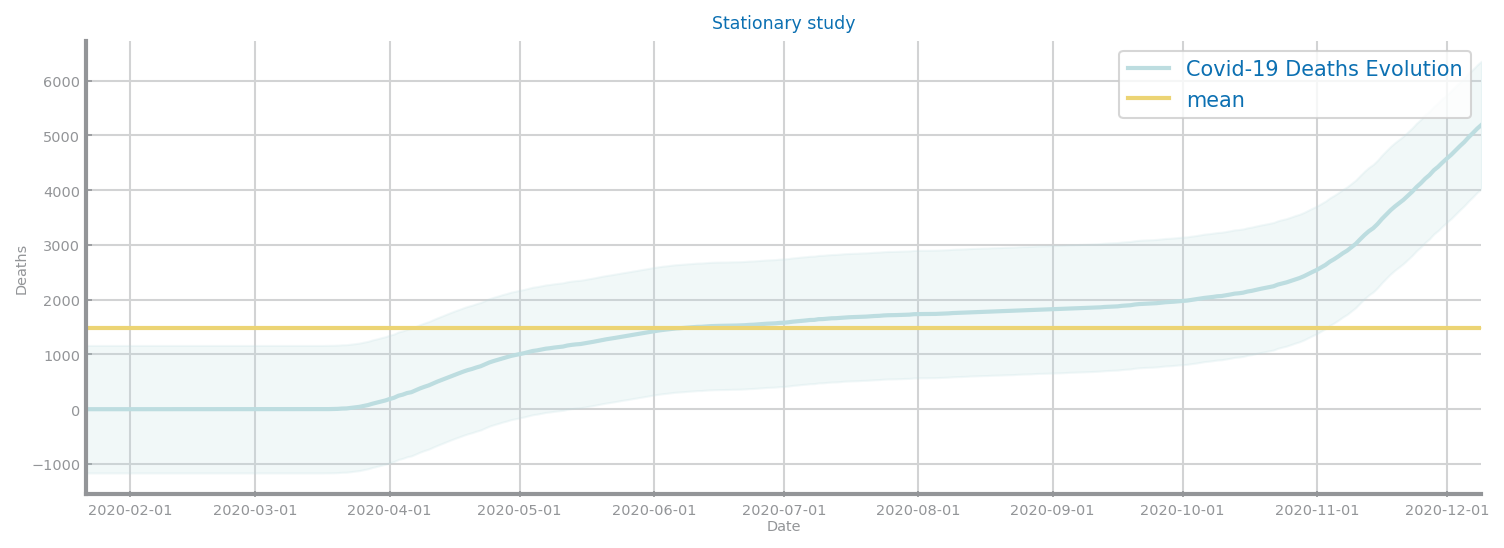

In [80]:
import numpy as np
dt_series = pd.Series(data['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'Covid-19 Deaths Evolution': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='Deaths', title='Stationary study', show_std=True)
plt.show()

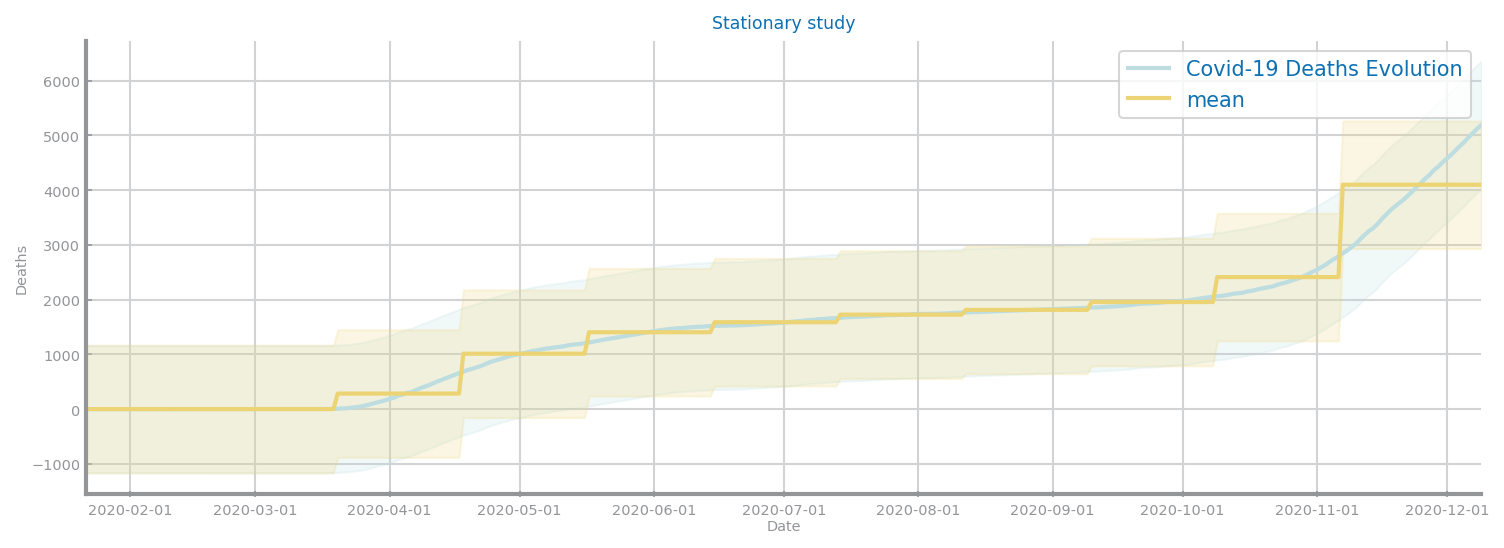

In [81]:
BINS = 11
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'Covid-19 Deaths Evolution': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='Deaths', title='Stationary study', show_std=True)
plt.show()

## deaths_pt.csv
Weekly death reports from 2015 to 2020

### Imports

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

### Dimensionality

Nr. Records =  286
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


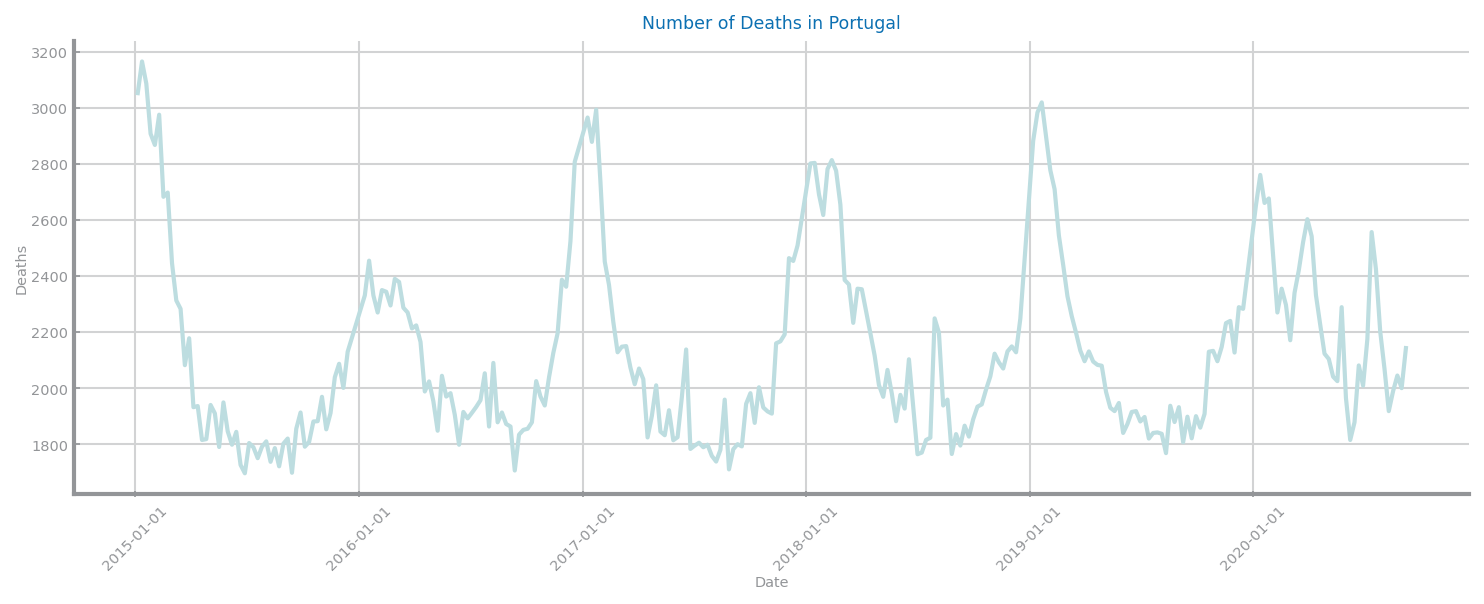

            deaths
start_date        
2015-01-05    3054
2015-01-12    3167
2015-01-19    3088
2015-01-26    2909
2015-02-02    2869
...            ...
2020-08-10    1919
2020-08-17    1990
2020-08-24    2046
2020-08-31    2001
2020-09-07    2144

[286 rows x 1 columns]


In [92]:
data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["start_date"]) #Dates weren't sorted


print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='Date', y_label='Deaths', title='Number of Deaths in Portugal')
plt.xticks(rotation = 45)
plt.show()

print(data)

### Granularity

#### Weekly (default)

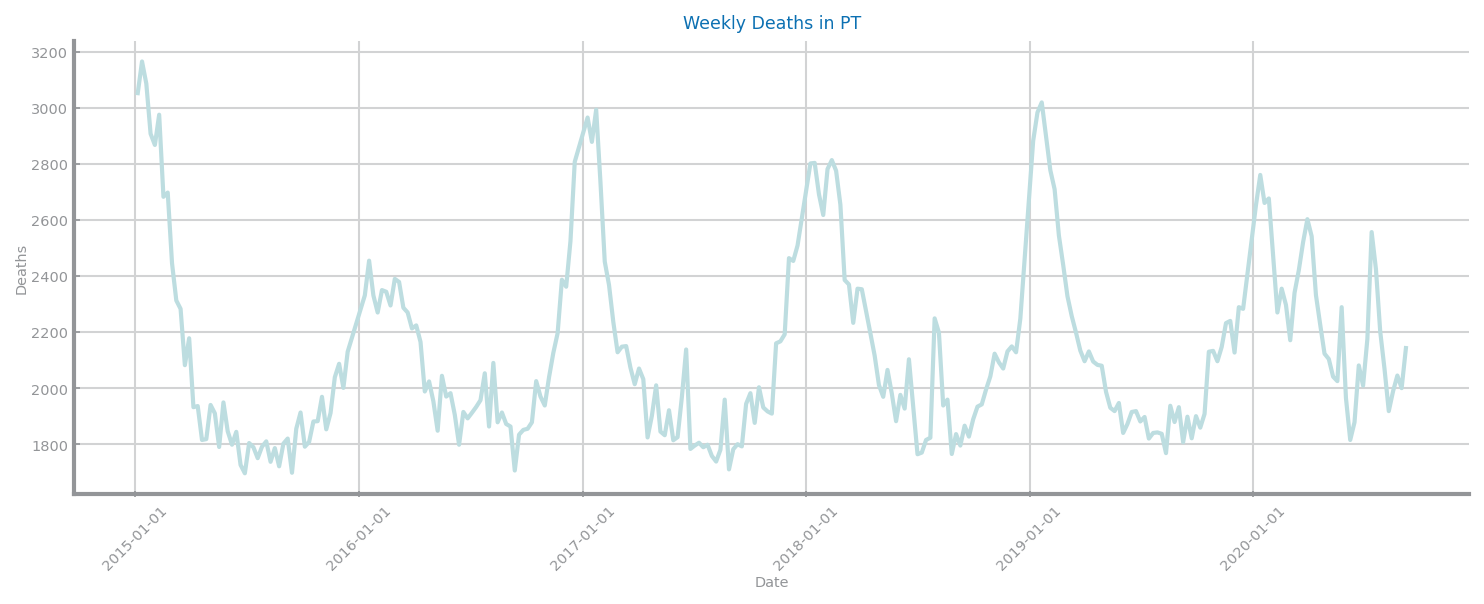

In [93]:
weekly_df = data.copy().groupby(data.index.date).mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(weekly_df, title='Weekly Deaths in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

#### Monthly

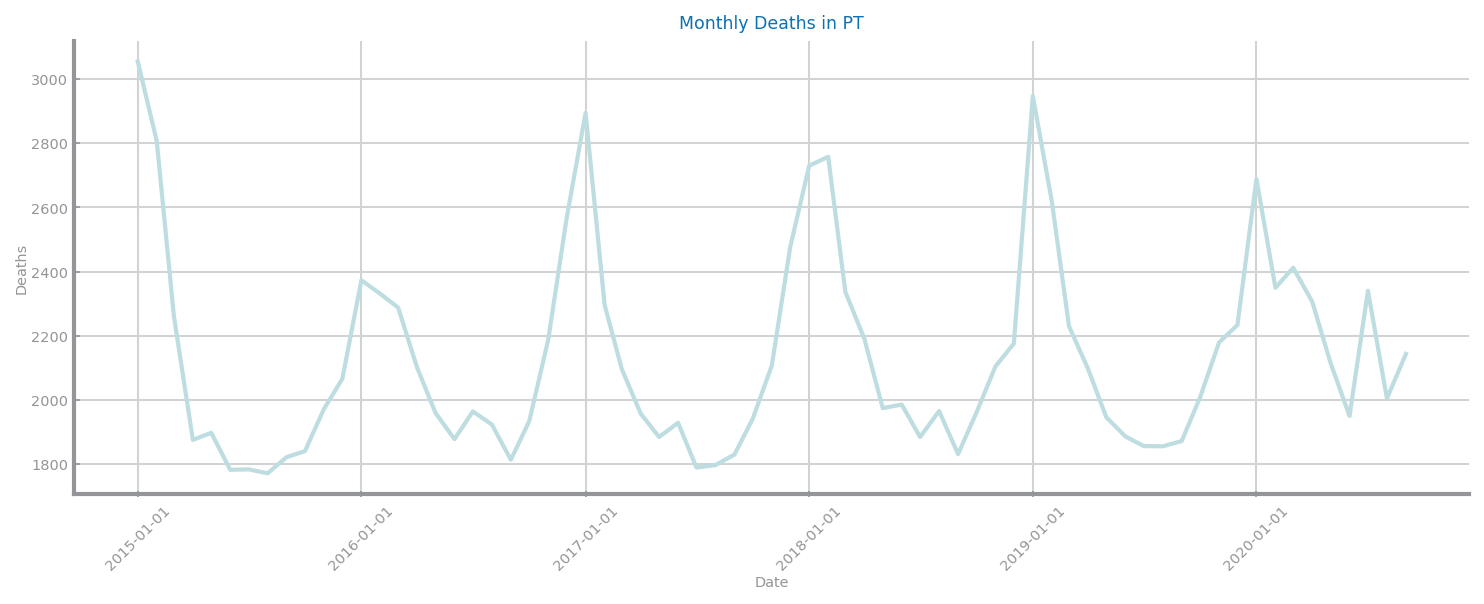

             deaths
start_date         
2015-01-01  3054.50
2015-02-01  2807.25
2015-03-01  2261.40
2015-04-01  1876.25
2015-05-01  1898.25
...             ...
2020-05-01  2115.75
2020-06-01  1950.60
2020-07-01  2340.75
2020-08-01  2005.20
2020-09-01  2144.00

[69 rows x 1 columns]
(69, 1)


In [94]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).mean()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(month_df, title='Monthly Deaths in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(month_df)
print(month_df.shape)

#### Quarterly

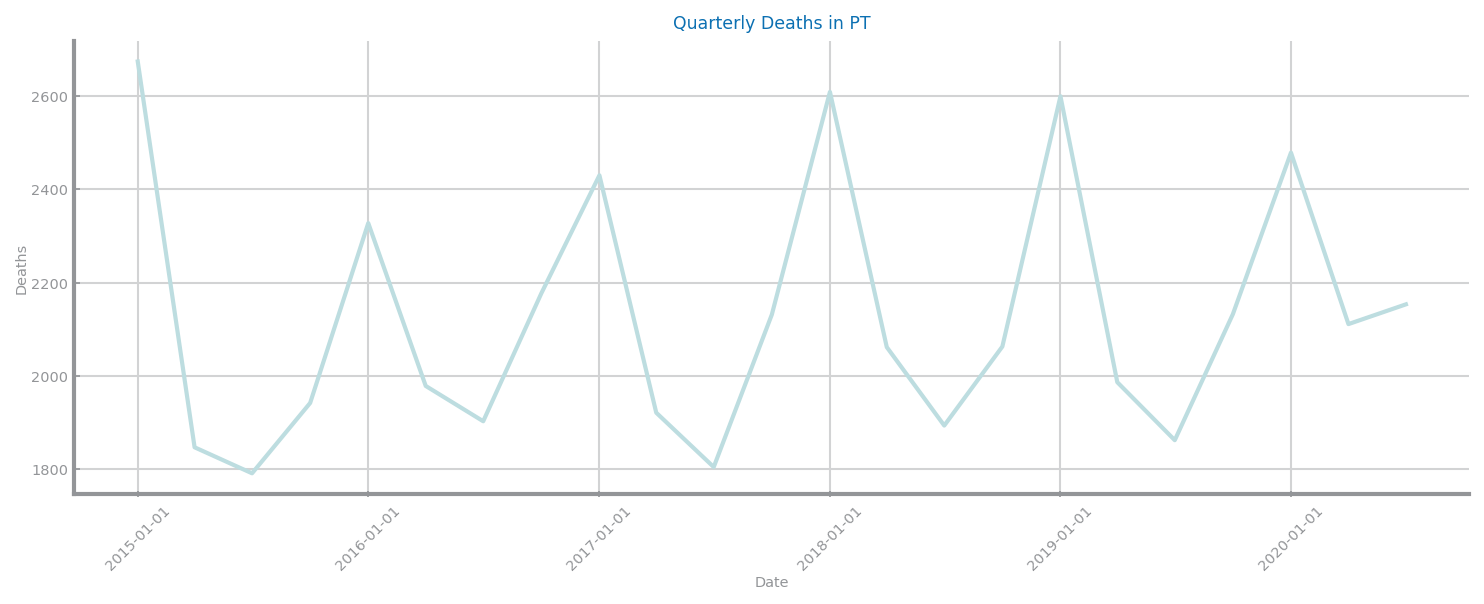

                 deaths
Date                   
2015-01-01  2673.384615
2015-04-01  1847.153846
2015-07-01  1791.461538
2015-10-01  1942.090909
2016-01-01  2327.250000
2016-04-01  1978.538462
2016-07-01  1902.923077
2016-10-01  2176.750000
2017-01-01  2429.583333
2017-04-01  1921.230769
2017-07-01  1804.846154
2017-10-01  2131.333333
2018-01-01  2608.250000
2018-04-01  2061.692308
2018-07-01  1893.692308
2018-10-01  2062.916667
2019-01-01  2598.916667
2019-04-01  1986.538462
2019-07-01  1862.357143
2019-10-01  2132.272727
2020-01-01  2478.230769
2020-04-01  2111.000000
2020-07-01  2153.300000
(23, 1)


In [95]:
index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).mean()
quarter_df['Date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Quarterly Deaths in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(quarter_df)
print(quarter_df.shape)

#### Yearly

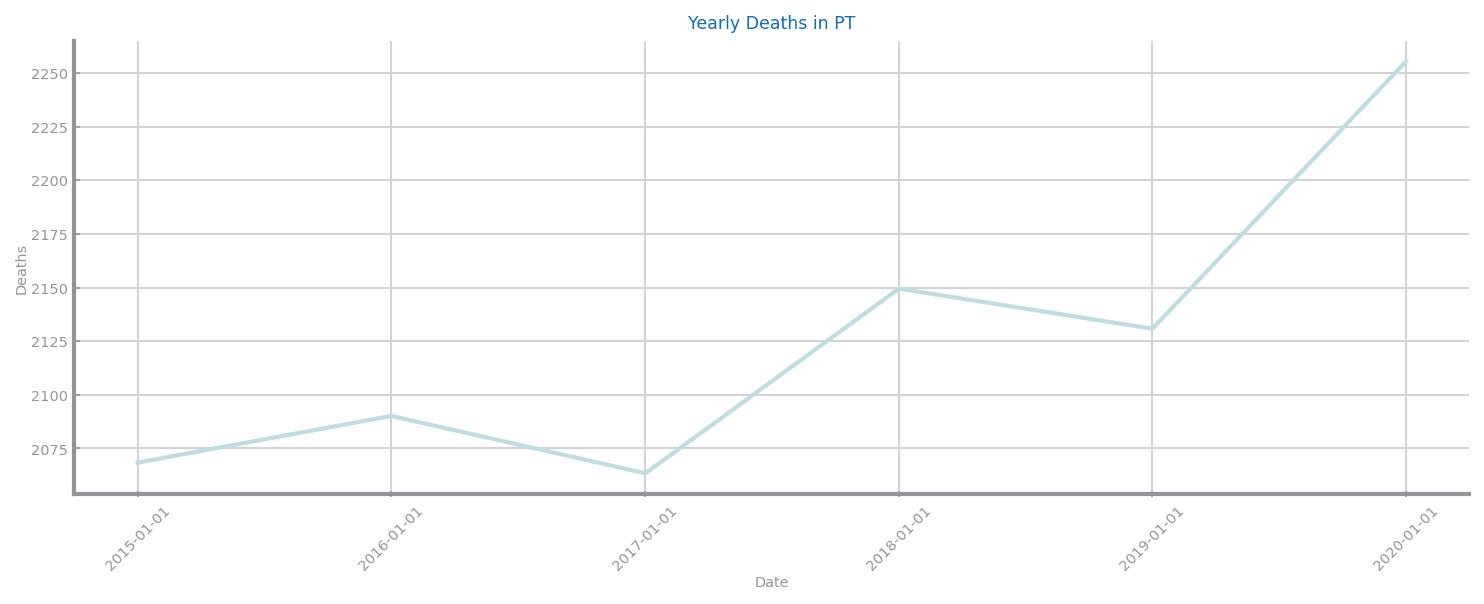

                 deaths
Date                   
2015-01-01  2673.384615
2015-04-01  1847.153846
2015-07-01  1791.461538
2015-10-01  1942.090909
2016-01-01  2327.250000
2016-04-01  1978.538462
2016-07-01  1902.923077
2016-10-01  2176.750000
2017-01-01  2429.583333
2017-04-01  1921.230769
2017-07-01  1804.846154
2017-10-01  2131.333333
2018-01-01  2608.250000
2018-04-01  2061.692308
2018-07-01  1893.692308
2018-10-01  2062.916667
2019-01-01  2598.916667
2019-04-01  1986.538462
2019-07-01  1862.357143
2019-10-01  2132.272727
2020-01-01  2478.230769
2020-04-01  2111.000000
2020-07-01  2153.300000
(23, 1)


In [96]:
index = data.index.to_period('Y')
year_df = data.copy().groupby(index).mean()
year_df['Date'] = index.drop_duplicates().to_timestamp()
year_df.set_index('Date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(year_df, title='Yearly Deaths in PT', x_label='Date', y_label='Deaths')
plt.xticks(rotation = 45)
plt.show()

print(quarter_df)
print(quarter_df.shape)

### Distribution

#### 5-Number Summary

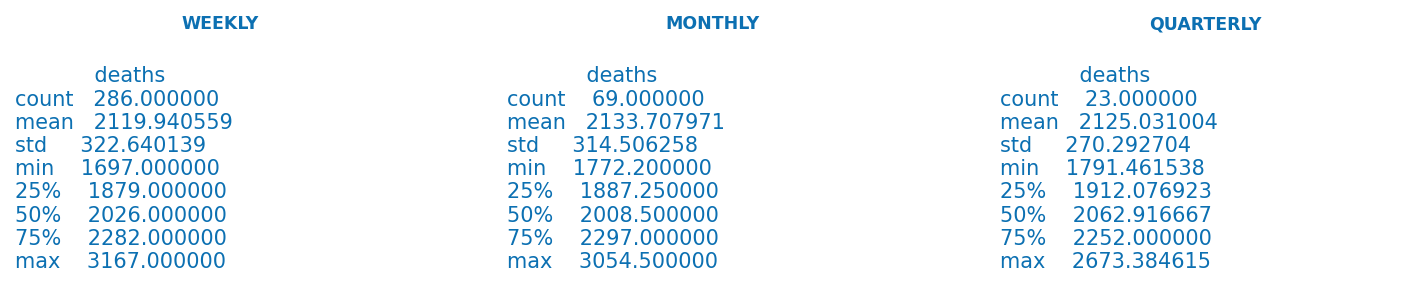

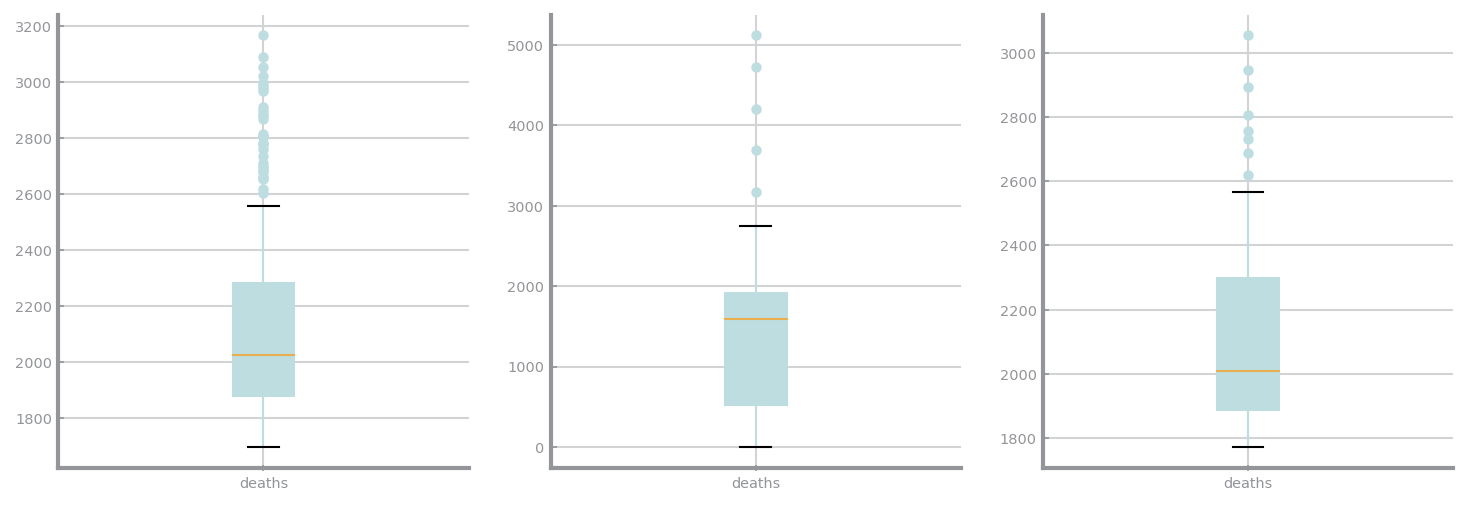

In [97]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).mean()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)

index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).mean()
quarter_df['Date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('Date', drop=True, inplace=True)

_, axs = plt.subplots(1, 3, figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('WEEKLY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('MONTHLY', fontweight="bold")
axs[1].text(0, 0, str(month_df.describe()))
axs[2].grid(False)
axs[2].set_axis_off()
axs[2].set_title('QUARTERLY', fontweight="bold")
axs[2].text(0, 0, str(quarter_df.describe()))
plt.show()

_, axs = plt.subplots(1, 3, figsize=(3*ts.HEIGHT, ts.HEIGHT))
data.boxplot(ax=axs[0])
week_df.boxplot(ax=axs[1])
month_df.boxplot(ax=axs[2])
plt.show()

#### Variables Distribution

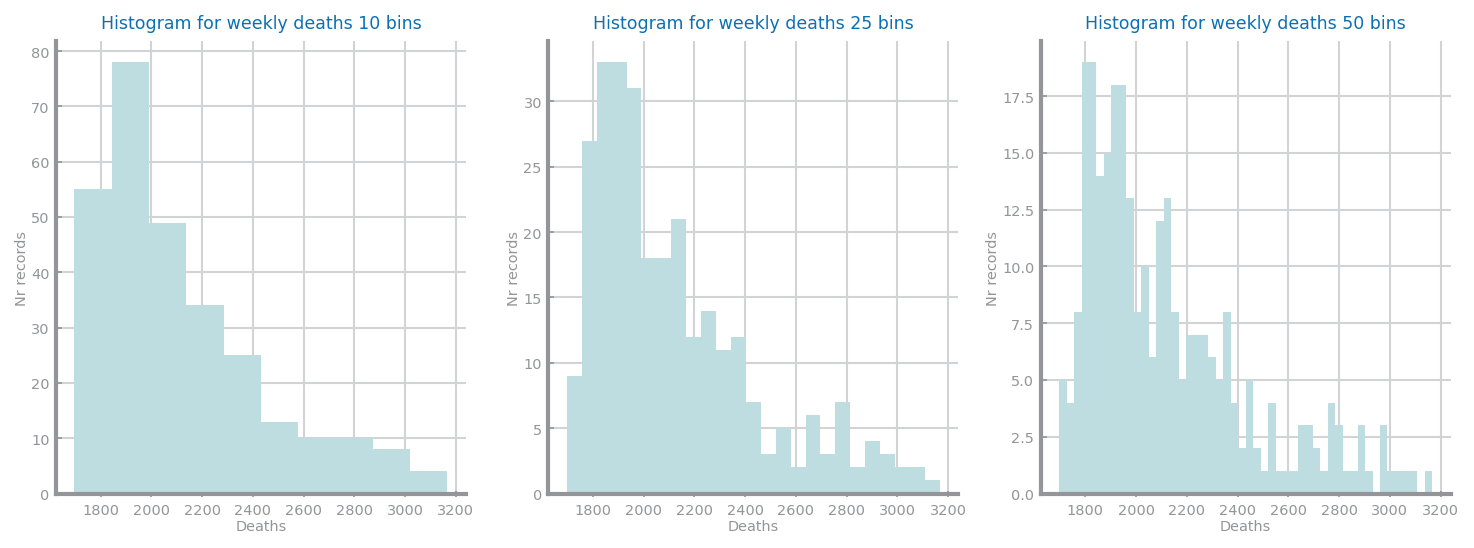

In [98]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
plt.show()

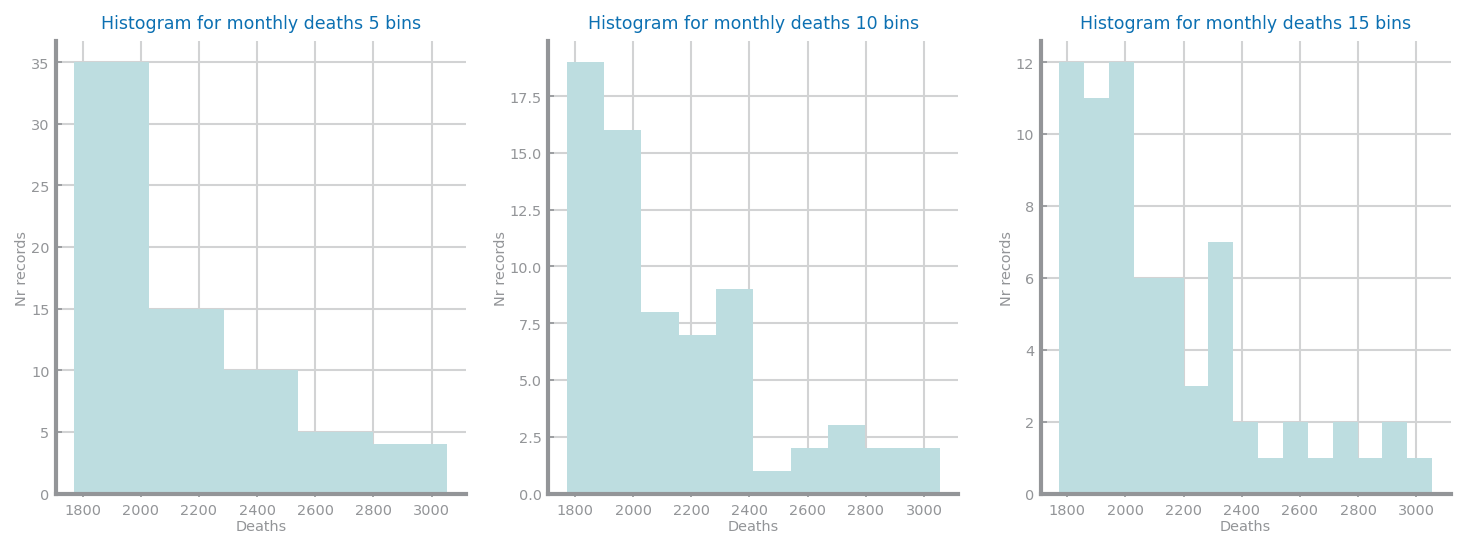

In [101]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(month_df.values, bins=bins[j])
plt.show()

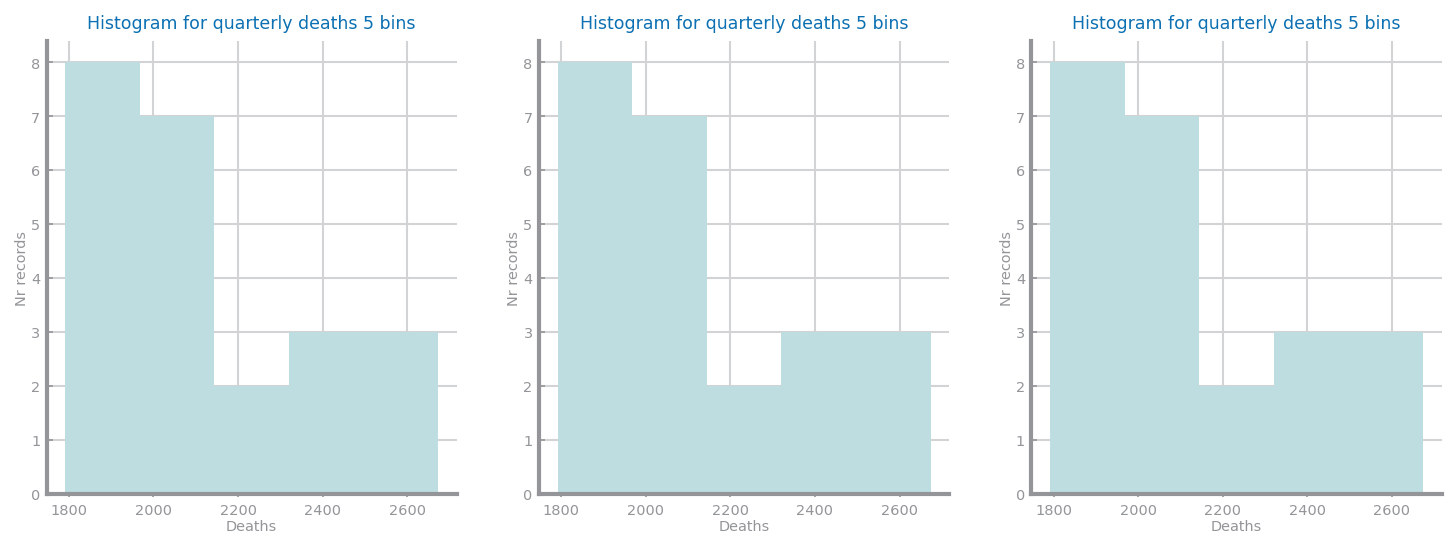

In [104]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for quarterly deaths %d bins'%bins[j])
    axs[j].set_xlabel('Deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(quarter_df.values, bins=bins[j])
plt.show()

### Stationarity

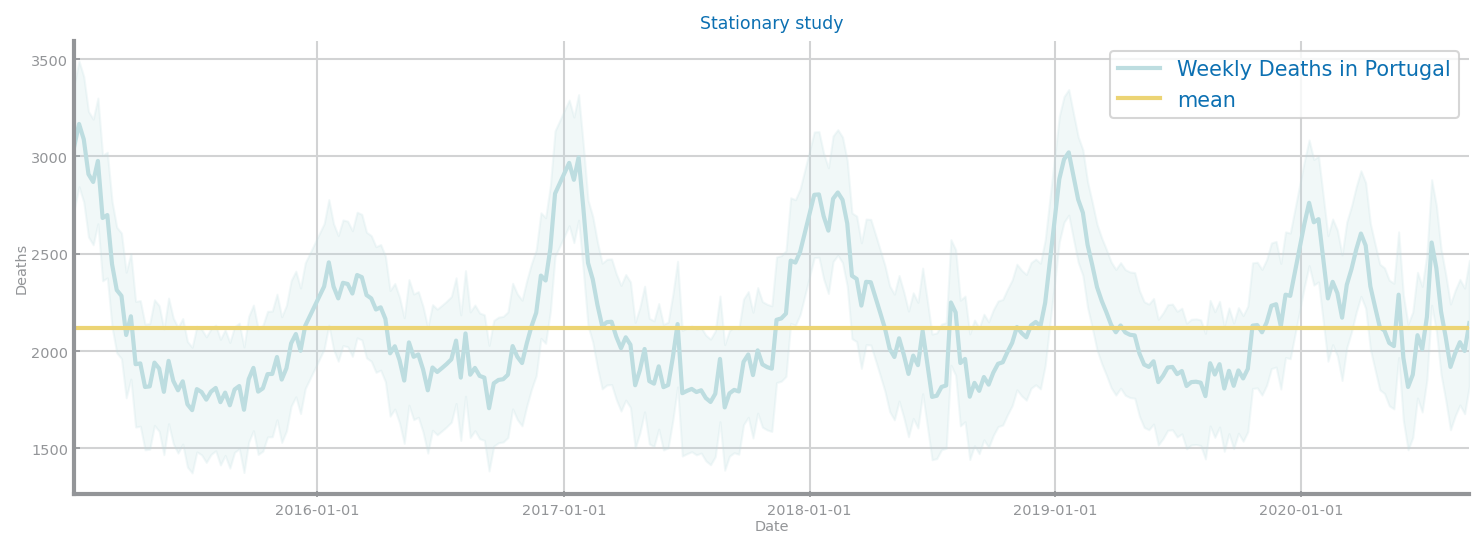

In [61]:
import numpy as np
dt_series = pd.Series(data['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'Weekly Deaths in Portugal': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='Deaths', title='Stationary study', show_std=True)
plt.show()

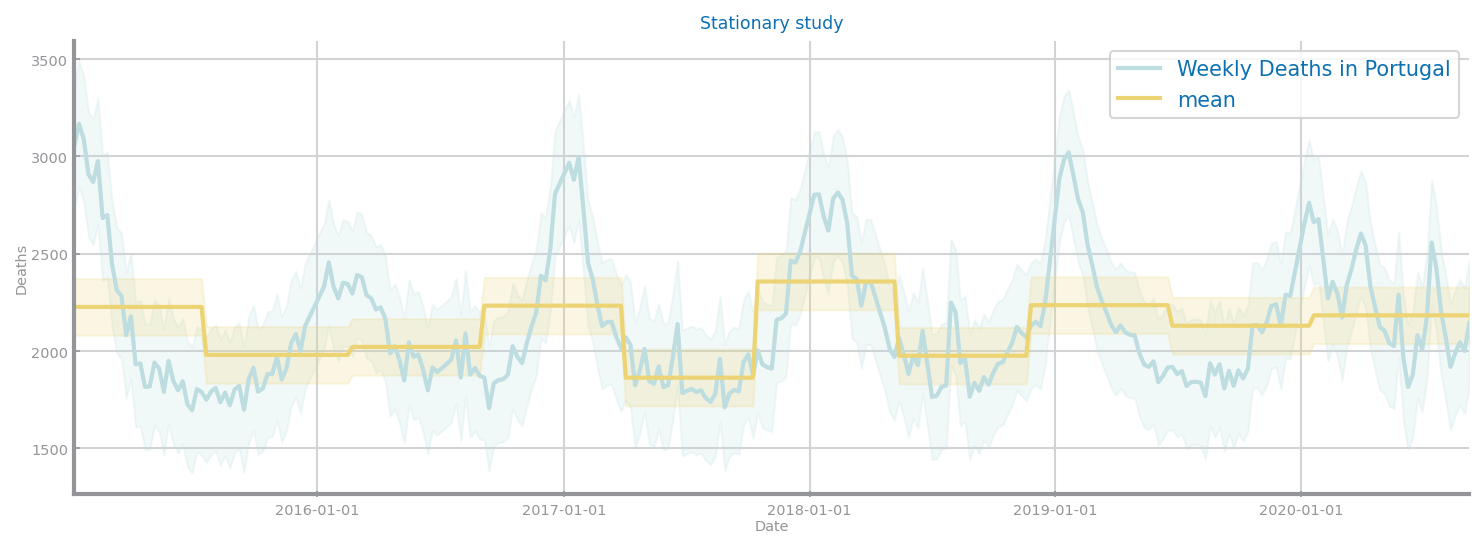

In [64]:
BINS = 10
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'Weekly Deaths in Portugal': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='Date', y_label='Deaths', title='Stationary study', show_std=True)
plt.show()